# This dataset doesn't have gender information but therefore it contains data until 2000

In [4]:
from school_analysis.preprocessing.load import Loader
import pandas as pd

loader = Loader()
melted_df = loader.load('students_with_special_educational_support_no_gender')

melted_df['year'] = pd.to_datetime(melted_df['year'], format='%Y')
melted_df['total'] = pd.to_numeric(melted_df['total'], errors='coerce')
total_over_years = melted_df.groupby('year')['total'].sum()

children_state = loader.load('school-children-by-state')
children_state = children_state.rename(columns={'Year': 'year'})
children_state['year'] = pd.to_datetime(children_state['year'], format='%Y')
child_amount_per_year = children_state.groupby('year')['Value'].sum()


#child_amount_per_year

children_state = loader.load('school-children-by-state')
children_state = children_state.rename(columns={'Year': 'year'})
children_state['year'] = pd.to_datetime(children_state['year'], format='%Y')
child_amount_per_year = children_state.groupby('year')['Value'].sum()

merged_df = pd.merge(total_over_years, child_amount_per_year, on='year')
merged_df['relative'] = merged_df['total']/merged_df['Value'] 
merged_df

ValueError: Unknown dataset # special educaitonal needs no gender

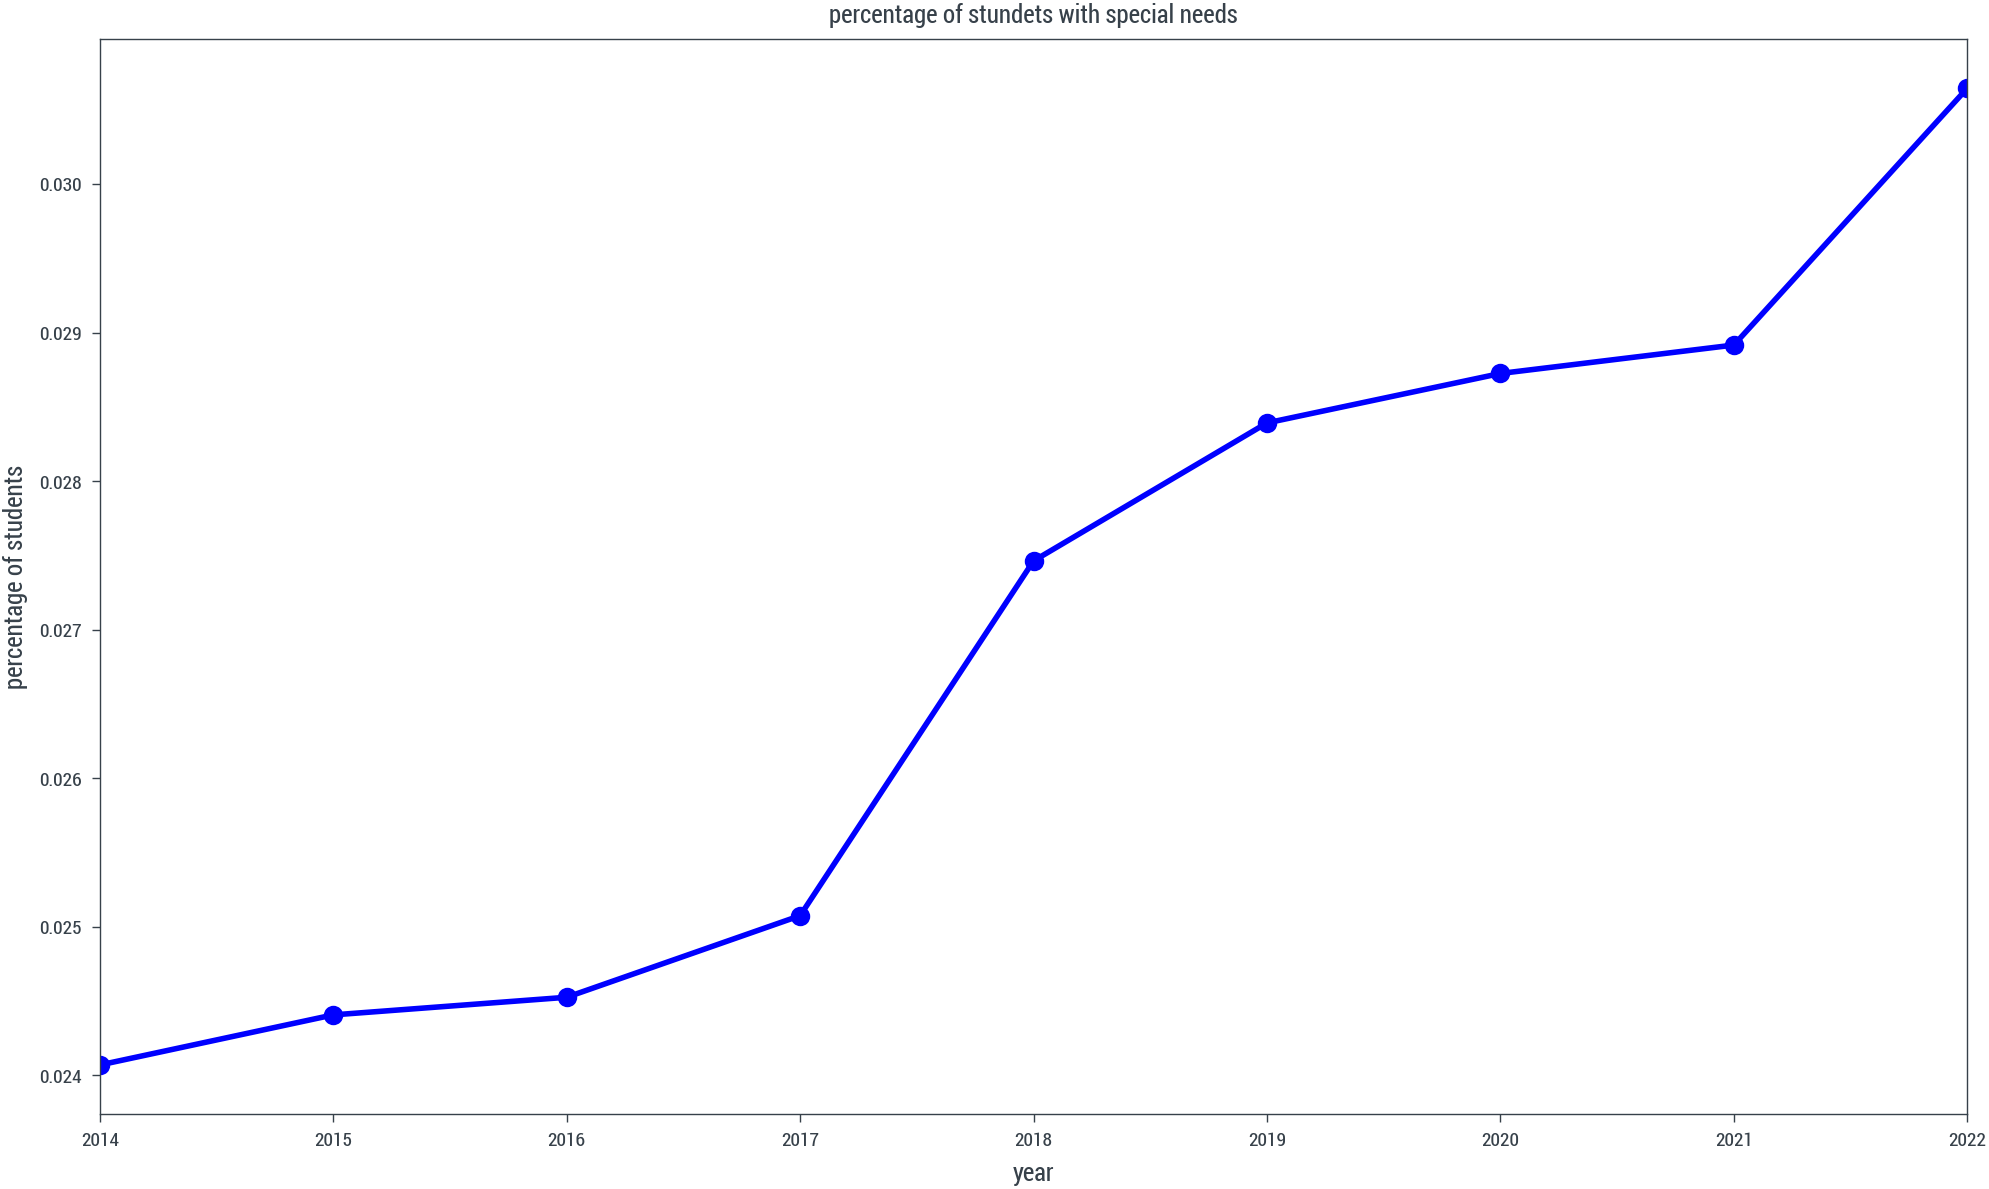

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
merged_df['relative'].plot(kind='line', marker='o', color='blue', linewidth=2)
plt.title('percentage of stundets with special needs')
plt.xlabel('year')
plt.ylabel('percentage of students')
plt.show()